# US Census Commute Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Travel Times To Work in the US

In [3]:
travel_times = pd.read_csv('travel_times_to_work.csv')

In [4]:
travel_times.head()

,US Travel Times to Work,Total Workers
0,Less than 10 Minutes,17483569
1,10 to 29 Minutes,69319607
2,30 to 59 Minutes,40641128
3,60+ Minutes,12503861


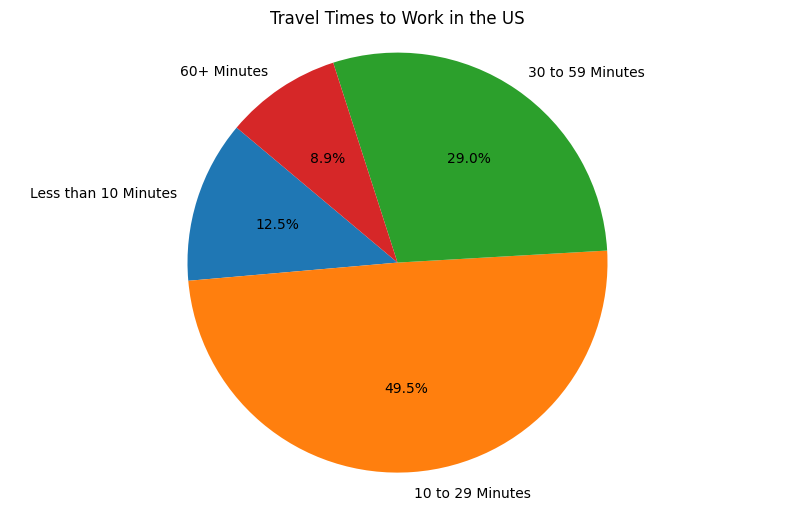

In [7]:
# Pie chart of travel times
plt.figure(figsize=(10, 6))
plt.pie(travel_times['Total Workers'], labels=travel_times['US Travel Times to Work'], autopct='%1.1f%%', startangle=140)
plt.title('Travel Times to Work in the US')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

More than half of US commuters travel under 30 minutes to work.

### Transportation modes by gender

In [9]:
modes = pd.read_csv('transportation_mode_by_gender.csv')

In [10]:
modes.head()

,Gender,Transportation Mode,Number of Workers
0,Male,"Car, truck, or van -- drove alone",148075
1,Male,"Car, truck, or van -- carpooled",89261
2,Male,Public transportation (excluding taxicab),75307
3,Male,Walked,32534
4,Male,Bicycle,29835


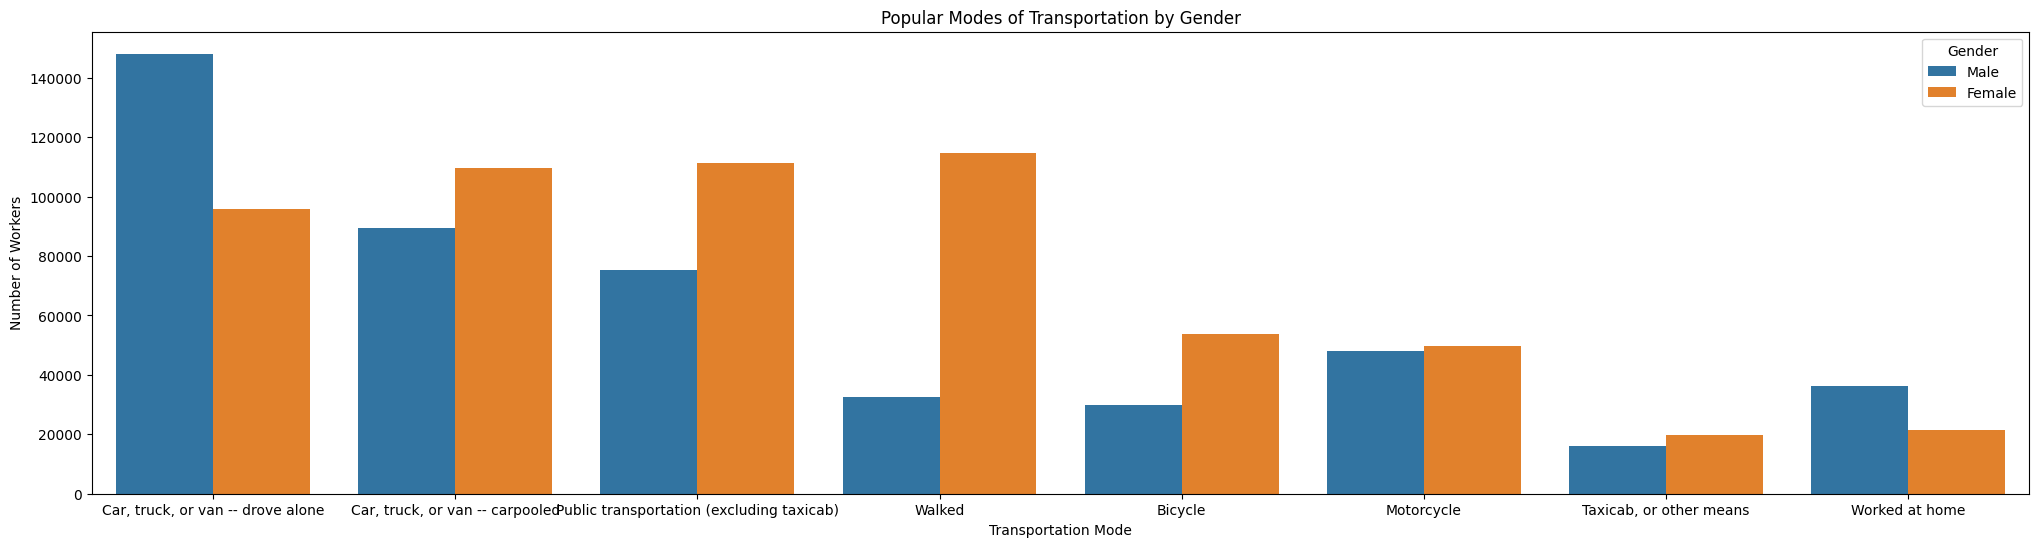

In [17]:
# Visualize transportation by gender in a bar chart
plt.figure(figsize=(25, 6))
sns.barplot(x='Transportation Mode', y='Number of Workers', hue='Gender', data=modes)
plt.title('Popular Modes of Transportation by Gender')
plt.xlabel('Transportation Mode')
plt.ylabel('Number of Workers')
plt.legend(title='Gender')
plt.show()

Female commuters are carpooling, using public transportation, and walking to work.
Male commuters are driving alone, carpooling, driving public transporation.
More men than women report working from home.

### Transportation mode by industry

In [19]:
industry = pd.read_csv('transportation_and_industries.csv')
industry.head()

,Transportation Mode,Industry,Value
0,"Car, Truck, or Van - Drove Alone","Agriculture, forestry, fishing and hunting, an...",1733974
1,"Car, Truck, or Van - Drove Alone",Construction,8311014
2,"Car, Truck, or Van - Drove Alone",Manufacturing,12160846
3,"Car, Truck, or Van - Drove Alone",Wholesale trade,2384439
4,"Car, Truck, or Van - Drove Alone",Retail trade,12536727


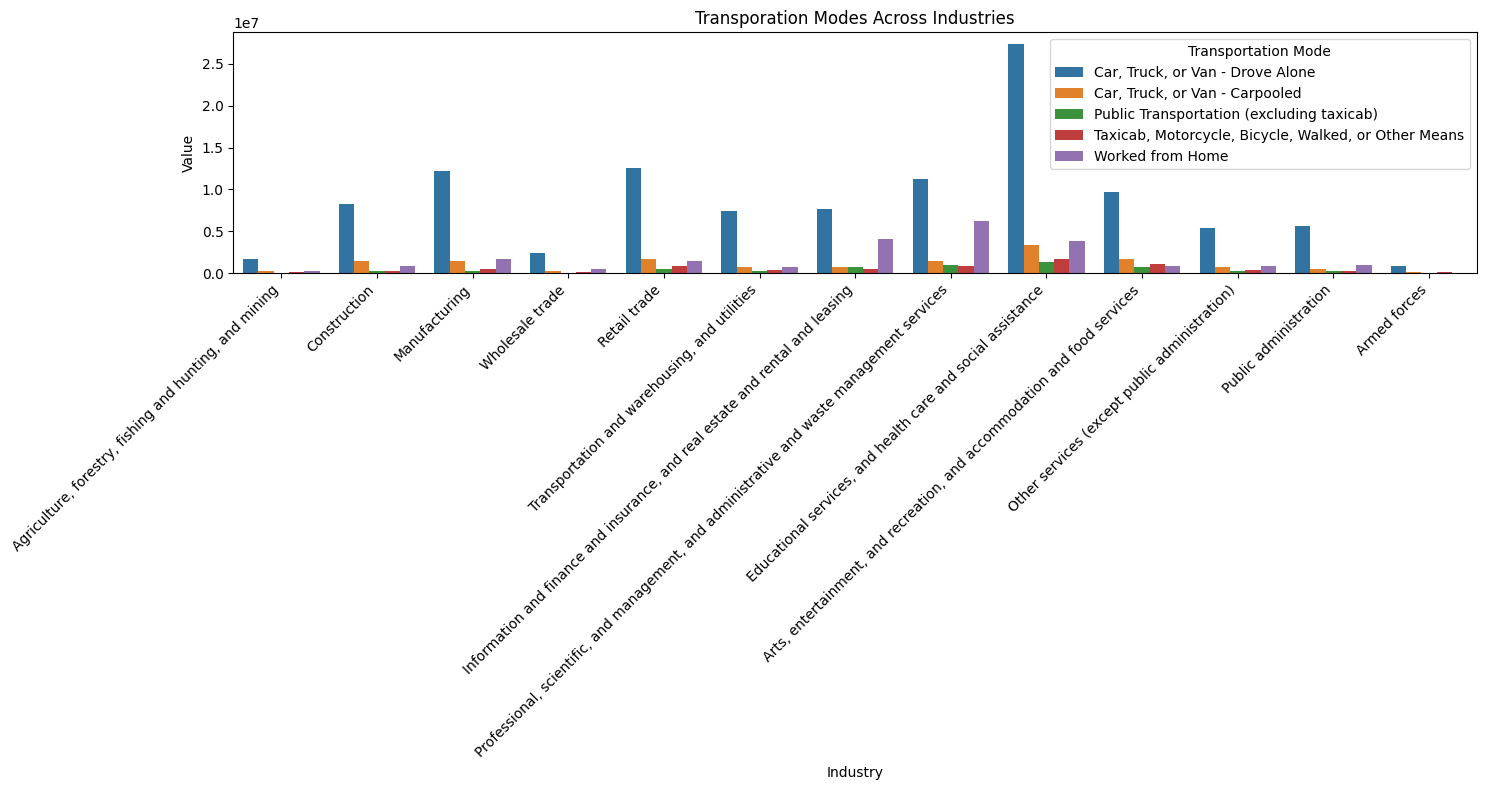

In [23]:
#plotting transportation mode by industry

plt.figure(figsize=(15, 8))
sns.barplot(x='Industry', y='Value', hue='Transportation Mode', data=industry)
plt.title('Transporation Modes Across Industries')
plt.xlabel('Industry')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transportation Mode')
plt.tight_layout()
plt.show()

### Transportation Modes Across Earnings

In [3]:
earnings = pd.read_csv('transportation_modes_and_earnings.csv')

In [4]:
earnings.head()

,Transportation Mode,Earnings Bracket,Value
0,"Car, Truck, or Van - Drove Alone","$1 to $9,999 or loss",9330559
1,"Car, Truck, or Van - Drove Alone","$10,000 to $14,999",5144909
2,"Car, Truck, or Van - Drove Alone","$15,000 to $24,999",10731449
3,"Car, Truck, or Van - Drove Alone","$25,000 to $34,999",12977755
4,"Car, Truck, or Van - Drove Alone","$35,000 to $49,999",19305876


In [6]:
#group data by earnings bracket and transportation mode
earnings_grouped = earnings.groupby(['Earnings Bracket', 'Transportation Mode']).sum().reset_index()
earnings_grouped.head(20)

,Earnings Bracket,Transportation Mode,Value
0,"$1 to $9,999 or loss","Car, Truck, or Van - Carpooled",1969381
1,"$1 to $9,999 or loss","Car, Truck, or Van - Drove Alone",9330559
2,"$1 to $9,999 or loss",Public Transportation (excluding taxicab),589616
3,"$1 to $9,999 or loss","Taxicab, Motorcycle, Bicycle, Walked, or Other...",1372898
4,"$1 to $9,999 or loss",Worked from Home,1512479
5,"$10,000 to $14,999","Car, Truck, or Van - Carpooled",914582
6,"$10,000 to $14,999","Car, Truck, or Van - Drove Alone",5144909
7,"$10,000 to $14,999",Public Transportation (excluding taxicab),315881
8,"$10,000 to $14,999","Taxicab, Motorcycle, Bicycle, Walked, or Other...",548786
9,"$10,000 to $14,999",Worked from Home,813935


In [7]:
# top 3 modes of transportation by earnings bracket
top_modes = earnings_grouped.sort_values(['Earnings Bracket', 'Value'], ascending=[True, False])
top_modes = top_modes.groupby('Earnings Bracket').head(3)
top_modes.head(20)

,Earnings Bracket,Transportation Mode,Value
1,"$1 to $9,999 or loss","Car, Truck, or Van - Drove Alone",9330559
0,"$1 to $9,999 or loss","Car, Truck, or Van - Carpooled",1969381
4,"$1 to $9,999 or loss",Worked from Home,1512479
6,"$10,000 to $14,999","Car, Truck, or Van - Drove Alone",5144909
5,"$10,000 to $14,999","Car, Truck, or Van - Carpooled",914582
9,"$10,000 to $14,999",Worked from Home,813935
11,"$15,000 to $24,999","Car, Truck, or Van - Drove Alone",10731449
10,"$15,000 to $24,999","Car, Truck, or Van - Carpooled",1912526
14,"$15,000 to $24,999",Worked from Home,1424288
16,"$25,000 to $34,999","Car, Truck, or Van - Drove Alone",12977755


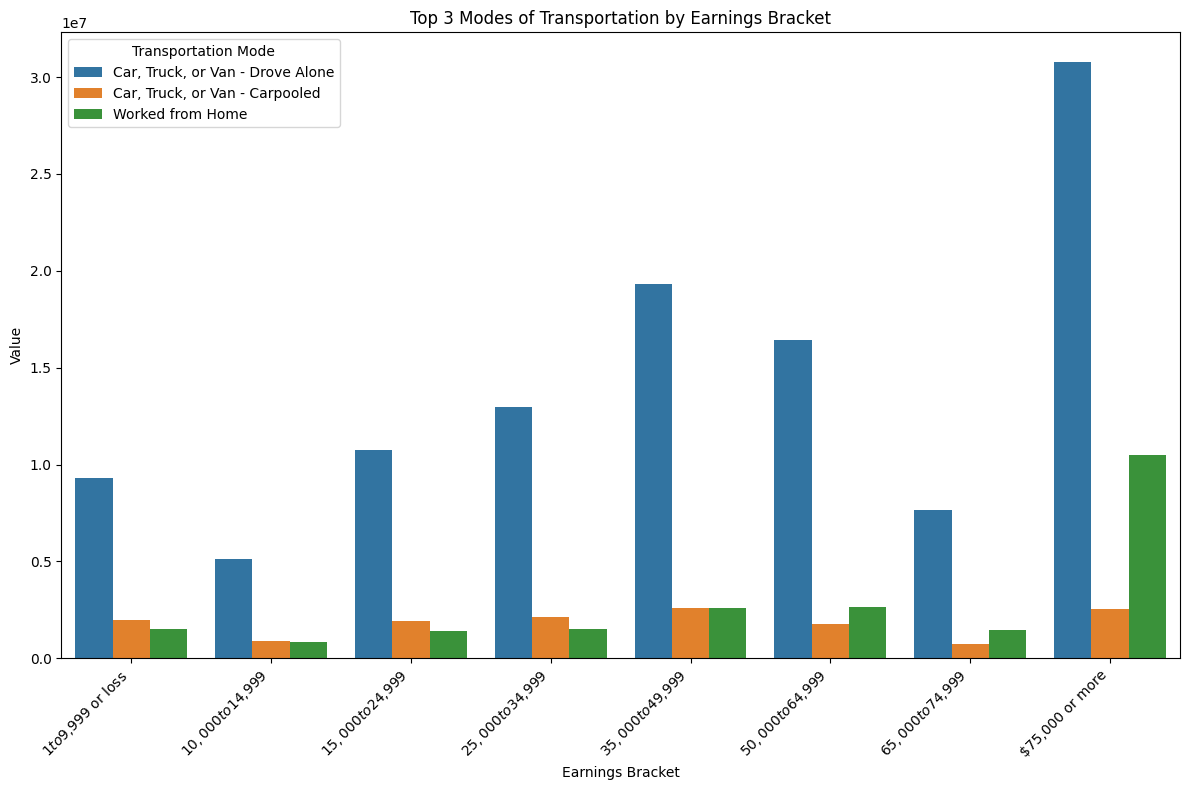

In [8]:
#plotting the top 3 modes of transportation by earnings bracket
plt.figure(figsize=(12, 8))
sns.barplot(x='Earnings Bracket', y='Value', hue='Transportation Mode', data=top_modes)
plt.title('Top 3 Modes of Transportation by Earnings Bracket')
plt.xlabel('Earnings Bracket')
plt.ylabel('Value')
plt.legend(title='Transportation Mode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# lets see the bottom 3 modes of transportation by earnings bracket
bottom_modes = earnings_grouped.sort_values(['Earnings Bracket', 'Value'], ascending=[True, False])
bottom_modes = bottom_modes.groupby('Earnings Bracket').tail(3)
bottom_modes.head(20)

,Earnings Bracket,Transportation Mode,Value
4,"$1 to $9,999 or loss",Worked from Home,1512479
3,"$1 to $9,999 or loss","Taxicab, Motorcycle, Bicycle, Walked, or Other...",1372898
2,"$1 to $9,999 or loss",Public Transportation (excluding taxicab),589616
9,"$10,000 to $14,999",Worked from Home,813935
8,"$10,000 to $14,999","Taxicab, Motorcycle, Bicycle, Walked, or Other...",548786
7,"$10,000 to $14,999",Public Transportation (excluding taxicab),315881
14,"$15,000 to $24,999",Worked from Home,1424288
13,"$15,000 to $24,999","Taxicab, Motorcycle, Bicycle, Walked, or Other...",939471
12,"$15,000 to $24,999",Public Transportation (excluding taxicab),629959
19,"$25,000 to $34,999",Worked from Home,1526800
